## choose k nearest neighbours for prediction

Q. Why not k==1?
A. Prone to overfitting

==> KNN does more computation on testing data than training data. 
==> Feature Scaling very very important to be applied.


In [7]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [14]:
breastData = datasets.load_breast_cancer()
scaler = preprocessing.StandardScaler()
x = breastData.data
y = breastData.target

#print(x)
scaler.fit(x)
x1 = scaler.transform(x)

#print(x1)
xtrain , xtest, ytrain , ytest = train_test_split(x1,y,random_state = 2,test_size = 0.3)

In [16]:
clf=KNeighborsClassifier()

clf.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [17]:
clf.score(xtest,ytest)

0.97660818713450293

# finding optimal k

Check for different values of k (odd) to find optimal k


We should check on training data only.

In [21]:
for i in range(1,30,2):
    clf = KNeighborsClassifier(n_neighbors = i)
    avg_score = cross_val_score(clf,xtrain,ytrain).mean()
    print(i,avg_score)

1 0.954809286899
3 0.967397859189
5 0.957259158752
7 0.957259158752
9 0.957221468415
11 0.954733906226
13 0.959784411277
15 0.959822101613
17 0.957334539424
19 0.954809286899
21 0.947271219659
23 0.949796472185
25 0.949796472185
27 0.947308909995
29 0.949834162521


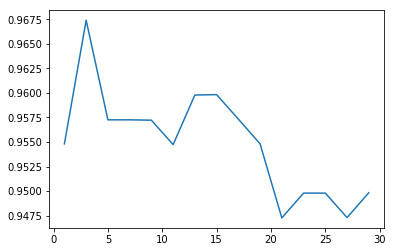

In [23]:
#plotting a graph

x_axis = []
y_axis = []

for i in range(1,30,2):
    clf = KNeighborsClassifier(n_neighbors = i)
    x_axis.append(i)
    avg_score = cross_val_score(clf,xtrain,ytrain).mean()
    y_axis.append(avg_score)
    
plt.plot(x_axis,y_axis)
plt.show()

# therefore we are getting our max value at k = 3